<a href="https://colab.research.google.com/github/Igorodriguesb/arquivos_legais/blob/main/Regress%C3%A3o_linear_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
dataset = {'Tempo':[1,3,4,4,6,8,10,10,11,13], 'Vendas': [91,110,106,116,119,129,139,143,138,159]}

dataset = pd.DataFrame(dataset)

dataset

,Tempo,Vendas
0,1,91
1,3,110
2,4,106
3,4,116
4,6,119
5,8,129
6,10,139
7,10,143
8,11,138
9,13,159


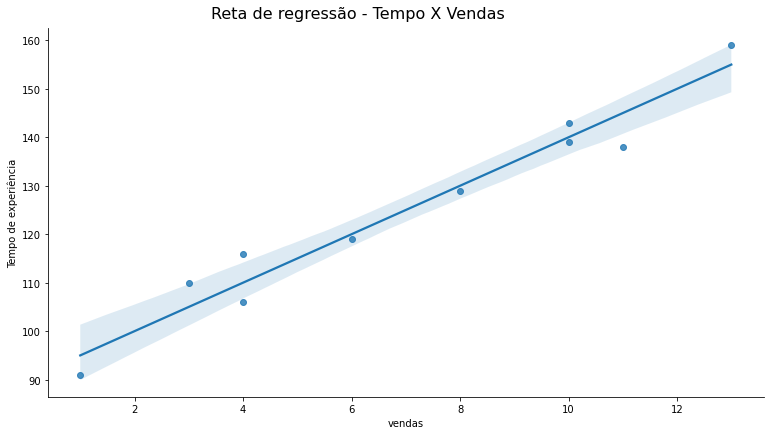

In [ ]:
from pandas.io.sql import DatabaseError
ax = sns.lmplot(x='Tempo', y='Vendas', data= dataset)
ax.fig.set_size_inches(12,6)
ax.fig.suptitle('Reta de regressão - Tempo X Vendas', fontsize=16, y=1.02)
ax.set_xlabels('vendas')
ax.set_ylabels('Tempo de experiência')
ax;

In [ ]:
dataset.corr()

,Tempo,Vendas
Tempo,1.000000,0.976883
Vendas,0.976883,1.000000


In [ ]:
import statsmodels.api as sm

In [ ]:
Y = dataset.Vendas
X = sm.add_constant(dataset.Tempo)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
resultado_regresao = sm.OLS(Y,X).fit()

In [ ]:
print(resultado_regresao.summary())

                            OLS Regression Results                            
Dep. Variable:                 Vendas   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     167.1
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           1.22e-06
Time:                        22:40:40   Log-Likelihood:                -28.355
No. Observations:                  10   AIC:                             60.71
Df Residuals:                       8   BIC:                             61.32
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         90.0000      3.075     29.265      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [ ]:
dataset['Y_previsto']= resultado_regresao.predict()
dataset.head()

,Tempo,Vendas,Y_previsto
0,1,91,95.0
1,3,110,105.0
2,4,106,110.0
3,4,116,110.0
4,6,119,120.0


In [ ]:
dataset['residuo']= dataset['Y_previsto'] - dataset['Vendas']
dataset.head()

,Tempo,Vendas,Y_previsto,residuo
0,1,91,95.0,4.0
1,3,110,105.0,-5.0
2,4,106,110.0,4.0
3,4,116,110.0,-6.0
4,6,119,120.0,1.0
